# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [84]:
df = pd.read_csv("../data/states_edu.csv")
noncleared = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [106]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_READING_8_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [107]:
df["YEAR"].nunique()

10

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [108]:
#remove na
df['average outcome'] = (df['AVG_READING_8_SCORE'] + df['AVG_READING_4_SCORE'] + df['AVG_MATH_8_SCORE'] + df['AVG_MATH_4_SCORE']) / 4
michigan = df[df['STATE'] == 'MICHIGAN']
ohio = df[df['STATE'] == 'OHIO']
if michigan['average outcome'].mean() > ohio['average outcome'].mean():
    print("MICHIGAN")
else:
    print("OHIO")

OHIO


Find the average for your outcome score across all states in 2019

In [109]:
filtered_df = df[df['YEAR'] == 2019]
filtered_df['average outcome'].mean()

250.89150943396226

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [132]:
noncleared["YEAR"].nunique()
states = noncleared.groupby('STATE')[['AVG_READING_8_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_MATH_4_SCORE']].max()
states['max outcome'] = states.max(axis=1)
states['max outcome']

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [144]:
#average test_score per dollar spent
#clean data to find average income 
income_per_student = df.dropna(subset=['TOTAL_EXPENDITURE', 'ENROLL_ALL']).copy()
income_per_student['income_per_student'] = income_per_student['TOTAL_EXPENDITURE'] / income_per_student['ENROLL_ALL']
average_income_per_student = income_per_student.groupby('STATE')['income_per_student'].mean()
average_income_per_student
#outcome_states = filtered_df('STATE')[[

STATE
ALABAMA                  9.343423
ALASKA                  17.080138
ARIZONA                  7.363574
ARKANSAS                 9.894378
CALIFORNIA              11.116984
COLORADO                 9.903763
CONNECTICUT             15.842624
DELAWARE                13.545586
DISTRICT_OF_COLUMBIA    14.988963
FLORIDA                  9.718813
GEORGIA                 10.095435
HAWAII                  11.750576
IDAHO                    7.015515
ILLINOIS                12.665572
INDIANA                 10.612445
IOWA                    11.340362
KANSAS                  10.691973
KENTUCKY                 9.672393
LOUISIANA               10.381986
MAINE                   13.097361
MARYLAND                13.819689
MASSACHUSETTS           15.125025
MICHIGAN                11.623885
MINNESOTA               12.302784
MISSISSIPPI              8.381735
MISSOURI                10.278254
MONTANA                 10.593597
NEBRASKA                11.392955
NEVADA                   9.237769
NEW_HAMP

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**
I created a table of the average expenditure per student for every state. With this table, you can compare spending per student to the average test scores. This will allow us to see if there is a correlation between increasing money per student and test scores.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'average outcome')

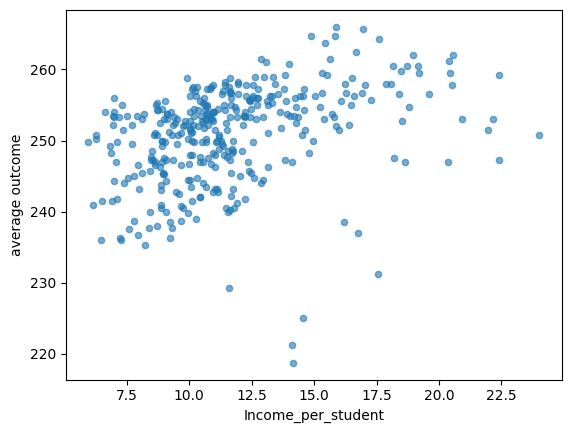

In [147]:
income_per_student.plot.scatter(x='income_per_student', y='average outcome', alpha=.6)
plt.xlabel('Income_per_student')
plt.ylabel('average outcome')

The average outcome of all test scores per dollar spent

**Visualization 2**

Text(0, 0.5, 'Math Scores')

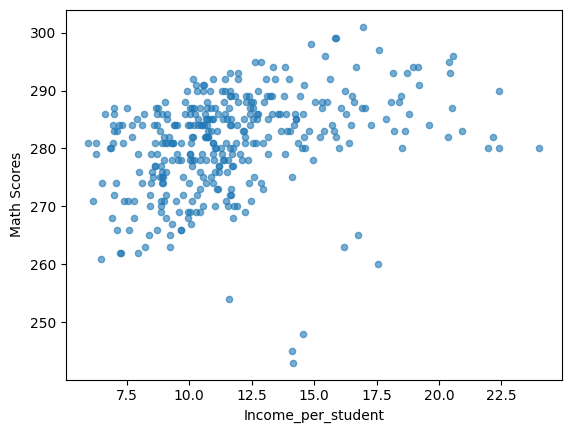

In [151]:
income_per_student.plot.scatter(x='income_per_student', y='AVG_MATH_8_SCORE', alpha=.6)
plt.xlabel('Income_per_student')
plt.ylabel('Math Scores')

The average outcome on math scores 8th grade per dollar spent

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [191]:
from sklearn.model_selection import train_test_split

In [217]:
df['income_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
X = df[['income_per_student','AVG_MATH_8_SCORE']].dropna()
y = df.loc[X.index]['average outcome']
y.fillna(y.median(), inplace=True)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [219]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [220]:
# create your model here
model = LinearRegression()

In [221]:
model.fit(X_train, y_train)

LinearRegression()

In [222]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [223]:
#mean error
print(np.mean(y_pred-y_test))
#mean absolute error
print(np.mean(np.abs(y_pred-y_test)))

-0.46043483775294825
1.2594590760573618


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

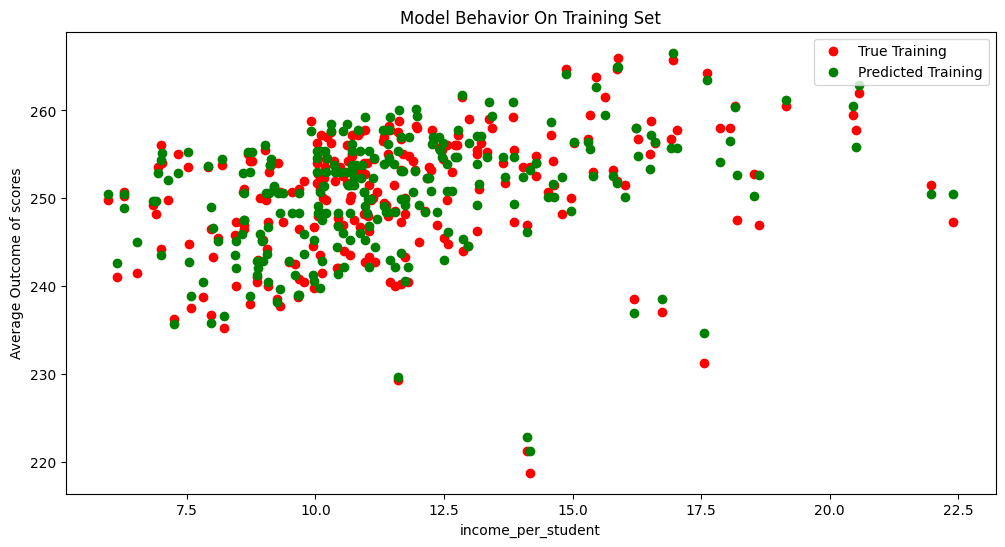

In [226]:
 col_name = 'income_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Outcome of scores')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

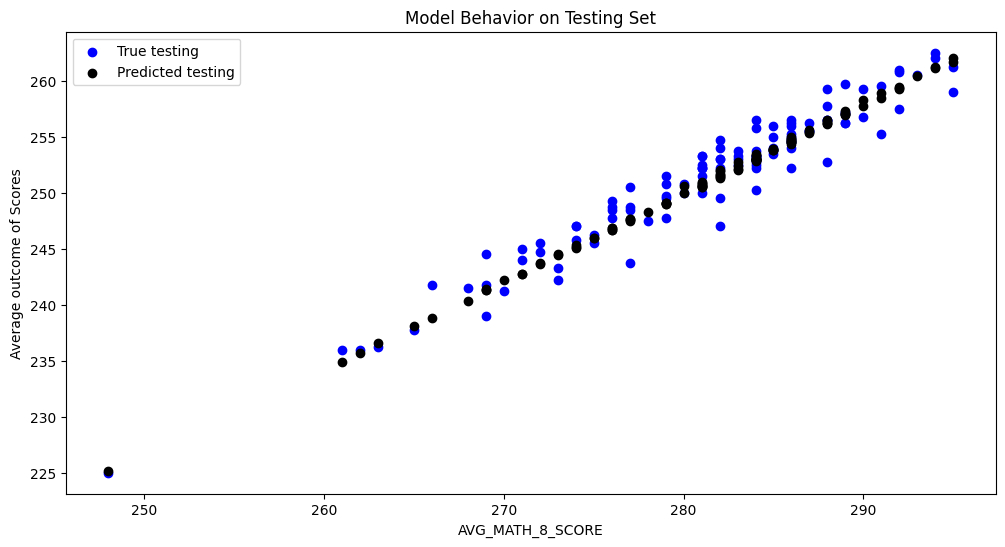

In [227]:
 col_name = 'AVG_MATH_8_SCORE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('Average outcome of Scores')
 plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

From my work, I realized that I need a lot more work with pandas because it is a little confusing. However, I discovered that the income spent on students does not change their performance much. The average test scores stayed at a similar area as expenditure increased. When I tested this with the model, the testing reasonably predicted the accurate testing; The data are in similar spots. I continued to see if spending more money on students increased average math grades because math can be a more complex subject to teach. I had similar findings to the average test scores. When I tried to do my last model, I tested how average math scores affect intermediate outcomes (which is pretty evident that when they increase, so do the results). I found a linear-like model, and the prediction was similar.